In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


['zomato.csv']


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sys

**Lets get an overview of the data Model scrapped**

In [3]:
df=pd.read_csv("../input/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


*The total number of columns are : 17  and rows are : 51717*

In [4]:
df.shape

(51717, 17)

**Columns description**
 
* url contains the url of the restaurant in the zomato website
 
* address contains the address of the restaurant in Bengaluru

* name contains the name of the restaurant
 
* online_order whether online ordering is available in the restaurant or not
 
* book_table table book option available or not

* rate contains the overall rating of the restaurant out of 5

* votes contains total number of rating for the restaurant as of the above mentioned date
 
* phone contains the phone number of the restaurant
 
* location contains the neighborhood in which the restaurant is located

* rest_type restaurant type
 
* dish_liked dishes people liked in the restaurant
 
* cuisines food styles, separated by comma
 
* approx_cost(for two people) contains the approximate cost for meal for two people
 
* reviews_list list of tuples containing reviews for the restaurant, each tuple
 
* menu_item contains list of menus available in the restaurant
 
* listed_in(type) type of meal

* listed_in(city) contains the neighborhood in which the restaurant is listed




Text(0.5, 0, 'Number of outlets')

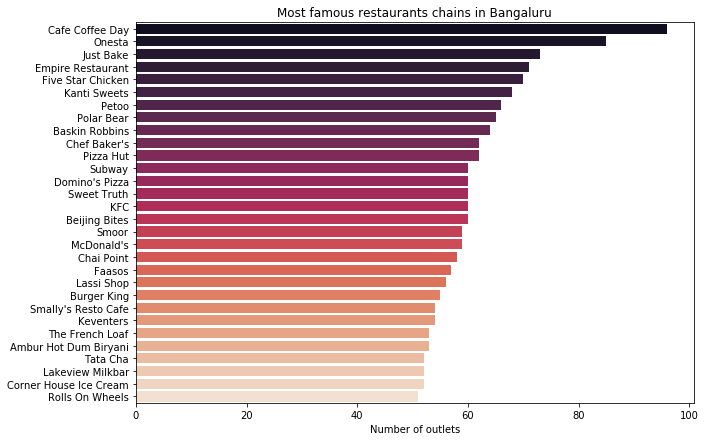

In [5]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:30]
sns.barplot(x=chains,y=chains.index,palette='rocket')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

**These are the top food chains in Bangalore Apparently**

Text(0.5, 0, 'Number of outlets')

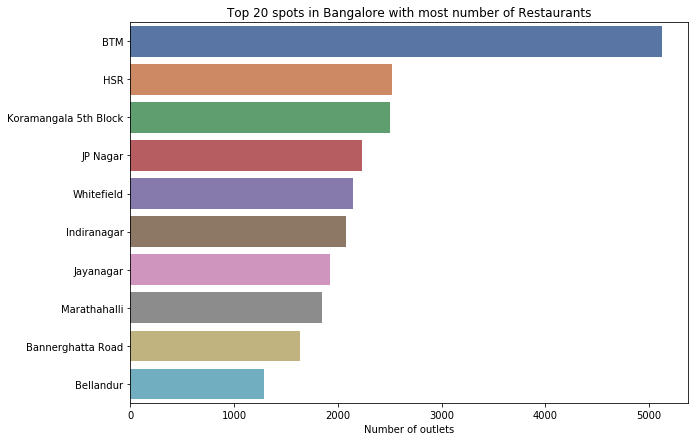

In [6]:
plt.figure(figsize=(10,7))
locs=df['location'].value_counts()[:10]
sns.barplot(x=locs,y=locs.index,palette='deep')
plt.title("Top 20 spots in Bangalore with most number of Restaurants")
plt.xlabel("Number of outlets")

We can see that BTM , HSR , Koramangala 5th Block, JP Nagar and Whitefield has the highest number of food Joints in Bangalore

So My goal is to have a food joint which will take online orders , I need to know which place takes highest number of online orders.

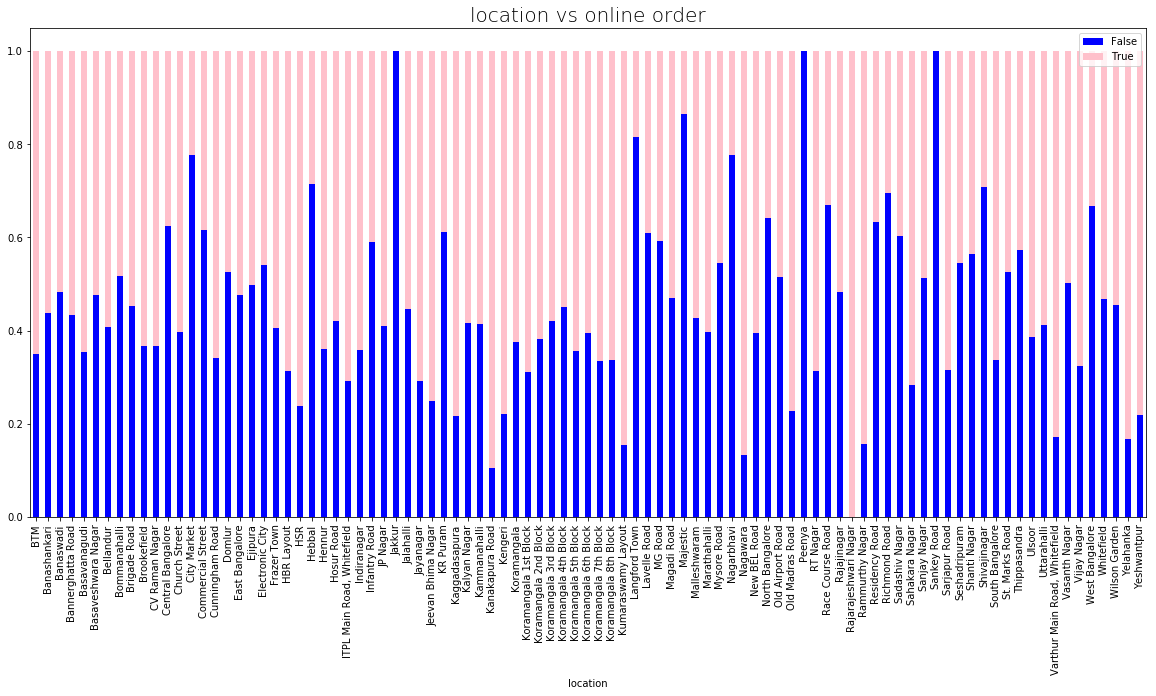

In [7]:


plt.rcParams['figure.figsize'] = (20, 9)
x = pd.crosstab(df['location'], df['online_order']=='Yes')
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['blue','pink'])
plt.title('location vs online order', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

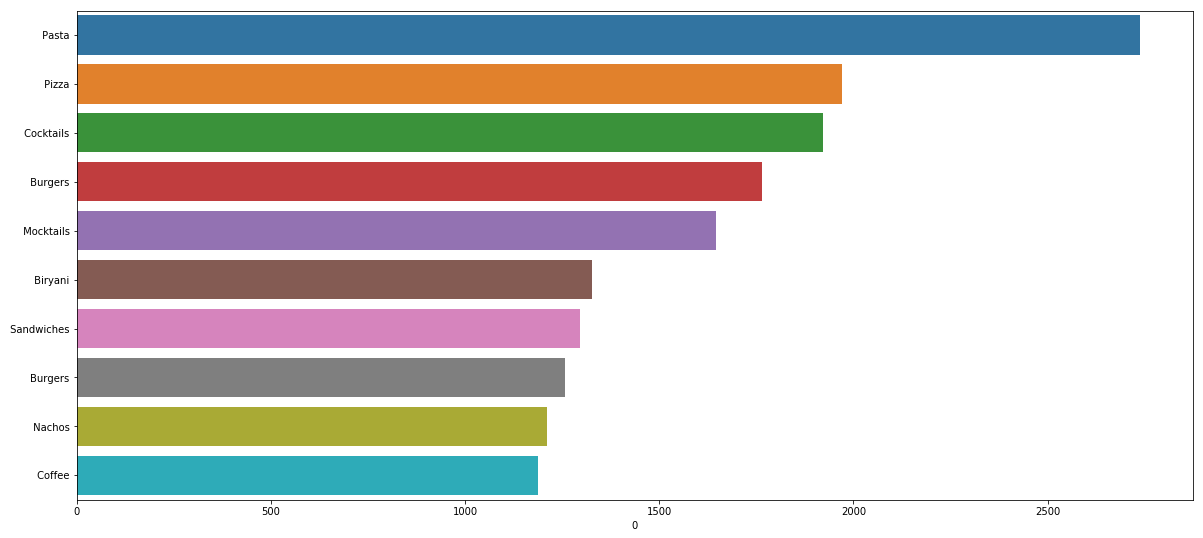

In [8]:
df=df[df['dish_liked'].notnull()]
df.index=range(df.shape[0])
import re
likes=[]
for i in range(df.shape[0]):
    splited_array=re.split(',',df['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

sns.barplot(pd.DataFrame(likes)[0].value_counts().head(10),pd.DataFrame(likes)[0].value_counts().head(10).index,orient='h')

Text(0.5, 0, 'NLocation')

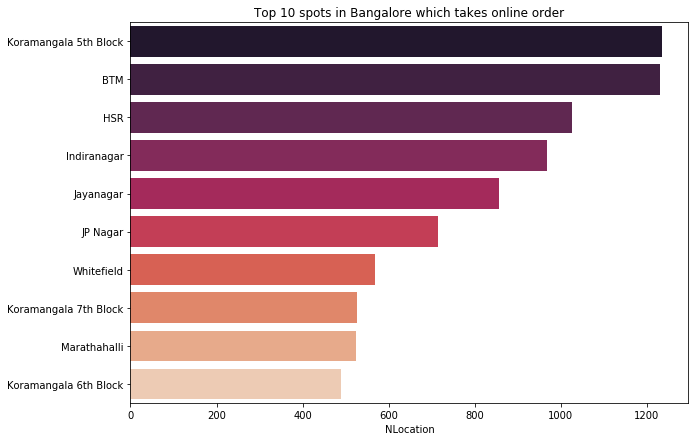

In [9]:
df_yes=df[df['online_order']=='Yes']
df_no=df[df['online_order']=='No']
plt.figure(figsize=(10,7))
locs=df_yes['location'].value_counts()[:10]
sns.barplot(x=locs,y=locs.index,palette='rocket')
plt.title("Top 10 spots in Bangalore which takes online order")
plt.xlabel("NLocation")


So we can see that Koramangala 5th Block and BTM takes the highest number of online order

In [10]:

pd.DataFrame(likes)[0].value_counts().tail(20)

 Aloo Tikki Chole           1
 Veg Shashlik               1
 Rose Kulfi                 1
 Keema Fries                1
 Saha Chowmein              1
 Lychee Delight             1
 Green Tea                  1
 Shami Kebab                1
Paneer Curry                1
 Wasabi Ice Cream           1
Lobster                     1
 Indian Sweets              1
 Mango Waffles              1
Pork Curry                  1
 Onion Uttapam              1
 Pineapple Pastry           1
Strawberry Cake             1
 Chicken Club Sandwiches    1
 Matka Phirni               1
 Vegetable Paratha          1
Name: 0, dtype: int64

**These are the top 20 disliked food in Bangalore**
Should definitely avoid adding in the list

In [11]:
rating_data=df[np.logical_and(df['rate'].notnull(), df['rate']!='NEW')]
rating_data.index=range(rating_data.shape[0])
import re
rating=[]
for i in range(rating_data.shape[0]):
    rating.append(rating_data['rate'][i][0:3])

rating_data['rate']=rating
rating_data.sort_values('rate',ascending=False)[['name','location','rate','rest_type']].head(60).drop_duplicates()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,location,rate,rest_type
21157,Punjab Grill,Malleshwaram,4.9,Casual Dining
12210,Asia Kitchen By Mainland China,Koramangala 5th Block,4.9,"Casual Dining, Bar"
2481,Belgian Waffle Factory,Brigade Road,4.9,Dessert Parlor
9546,AB's - Absolute Barbecues,BTM,4.9,Casual Dining
3468,Flechazo,Whitefield,4.9,Casual Dining
2013,Byg Brewski Brewing Company,Sarjapur Road,4.9,Microbrewery
3212,Punjab Grill,Whitefield,4.9,Casual Dining
4494,Belgian Waffle Factory,Koramangala 5th Block,4.9,Dessert Parlor
20879,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Indiranagar,4.9,Casual Dining
8154,Milano Ice Cream,Indiranagar,4.9,Dessert Parlor


These are the highest Rated Restaurants in the city

I had decided to establish a Casual Dining,Bar Type food place which takes online order.

Text(0.5, 0, 'Number of outlets')

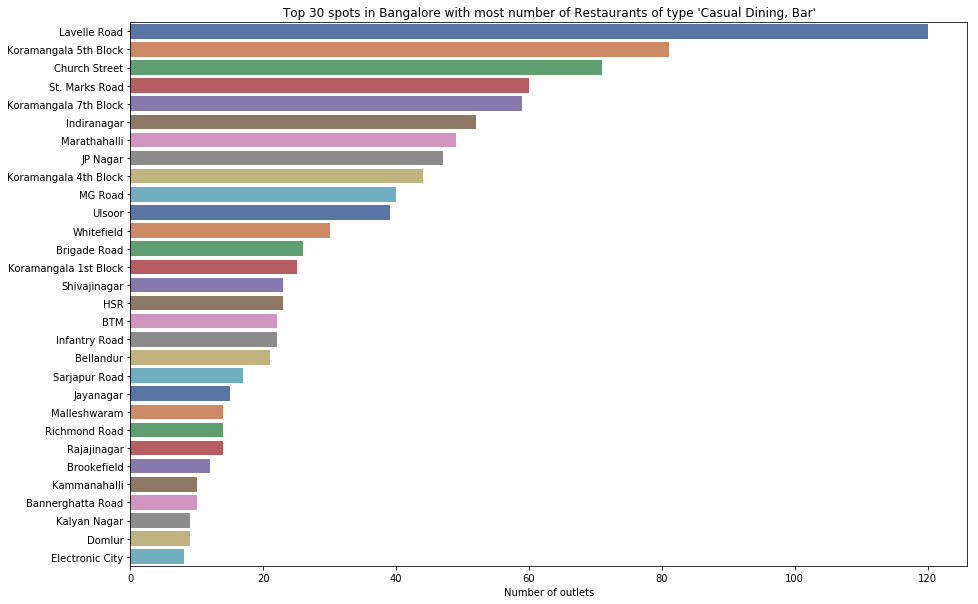

In [12]:
df_cdb=df[df['rest_type']=='Casual Dining, Bar']
df_cdb.head(5)

plt.figure(figsize=(15,10))
locs=df_cdb['location'].value_counts()[:30]
sns.barplot(x=locs,y=locs.index,palette='deep')
plt.title("Top 30 spots in Bangalore with most number of Restaurants of type 'Casual Dining, Bar'")
plt.xlabel("Number of outlets")

In [13]:

rating_data=df_cdb[np.logical_and(df_cdb['rate'].notnull(), df_cdb['rate']!='NEW')]
rating_data.index=range(rating_data.shape[0])
import re
rating=[]
for i in range(rating_data.shape[0]):
    rating.append(rating_data['rate'][i][0:3])

rating_data['rate']=rating
rating_data.sort_values('rate',ascending=False)[['name','location','rate','rest_type']].head(10).drop_duplicates()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,location,rate,rest_type
592,Asia Kitchen By Mainland China,Koramangala 5th Block,4.9,"Casual Dining, Bar"


**These are the Top Rated Casual Dining,Bar places**

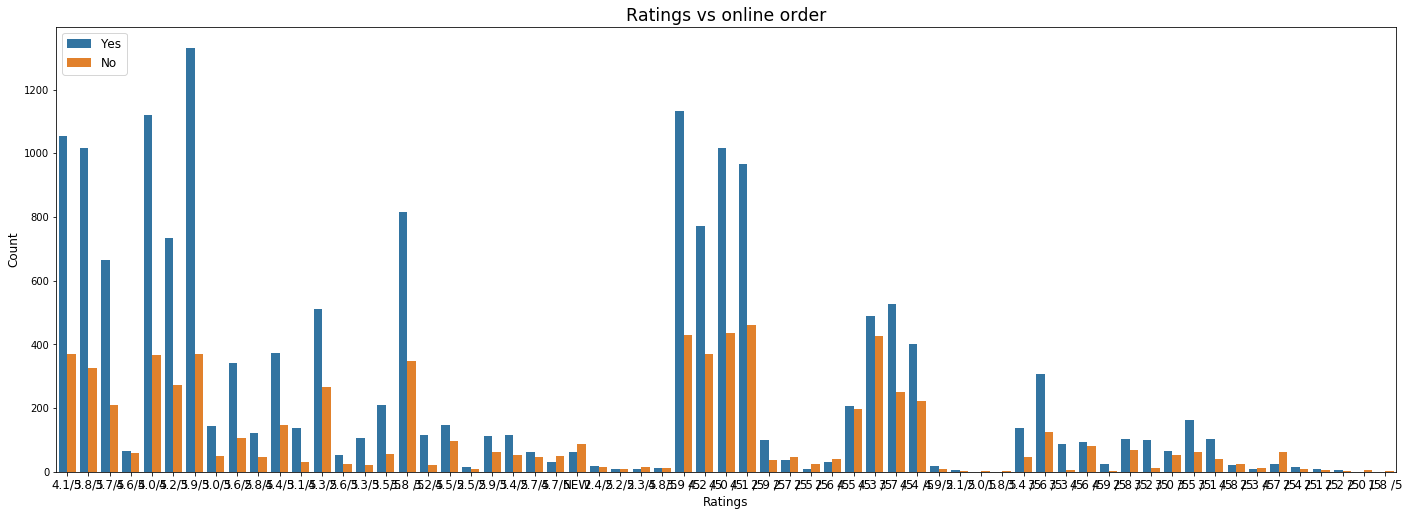

In [14]:
plt.figure(figsize=(24, 18))

plt.subplot(2,1,1)
sns.countplot(x= 'rate', hue= 'online_order', data= df[df.rate != 0])
plt.title('Ratings vs online order', fontsize='xx-large')
plt.xlabel('Ratings', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.xticks(fontsize='large')
plt.xticks(fontsize='large')
plt.legend(fontsize='large')




This above chart is about rating vs online orders

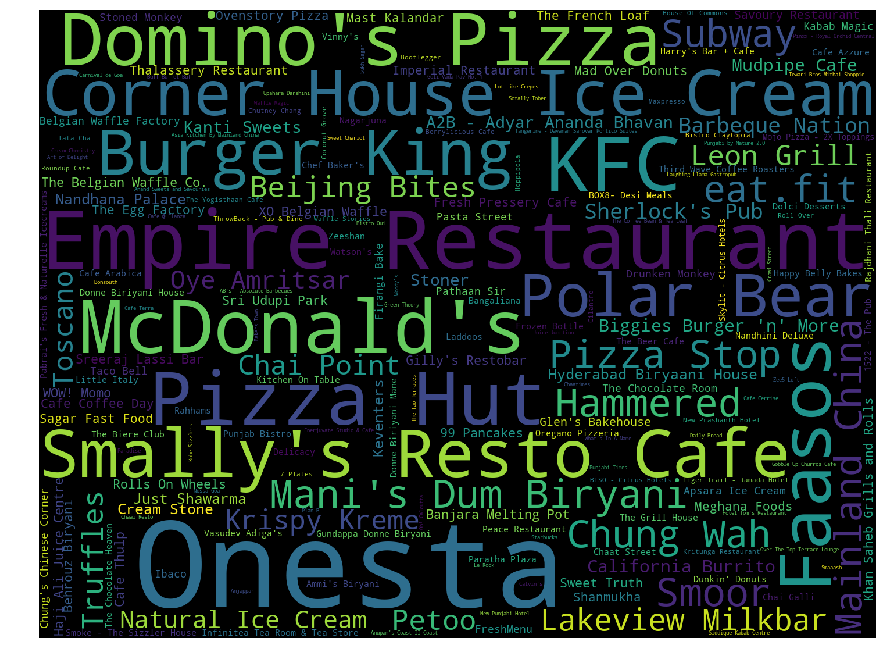

In [15]:
from subprocess import check_output
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df['name'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We are taking the average rating with perspective to the neighbourhoods.

In [16]:
df['rate'] = df['rate'].str.split('/').str[0]
df.loc[df['rate']=="NEW", 'rate'] = np.nan
df.loc[df['rate']=="-", 'rate'] = np.nan
df['rate'] = df['rate'].astype('float')

df.groupby(['location'])['rate'].mean().sort_values()[-50:][:-1]


location
Wilson Garden            3.817073
Whitefield               3.820359
Basaveshwara Nagar       3.823944
HSR                      3.830593
Basavanagudi             3.836713
Vijay Nagar              3.840000
New BEL Road             3.849675
Rajarajeshwari Nagar     3.850000
JP Nagar                 3.851662
Rajajinagar              3.869182
Koramangala 1st Block    3.874893
Kammanahalli             3.879537
Sarjapur Road            3.882135
Infantry Road            3.888421
Majestic                 3.888889
Magadi Road              3.900000
Sanjay Nagar             3.900000
Yelahanka                3.900000
Langford Town            3.900000
Shivajinagar             3.901449
City Market              3.928571
Jayanagar                3.934302
Kalyan Nagar             3.935394
HBR Layout               3.942857
Brigade Road             3.946479
Koramangala 6th Block    3.947418
Vasanth Nagar            3.950000
Hennur                   3.952941
MG Road                  3.957818
Indir

lets take out the geographical location of the neighbourhoods:

**Neighbourhood by types of restaurants **

In [18]:
types = set()
def func(x):
    if(type(x) == list):
        for y in x:
            types.add(y.strip())
_ = df['rest_type'].str.split(',').apply(func)
column_names = list(types)
# instantiate the dataframe

In [19]:
neighborhood = pd.DataFrame(columns=column_names)
neighborhood
neighborhood['neighborhood'] = df.groupby('location').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood
i=0
for i in range(0,len(df)):
    for x in types:
        if type(df.loc[i, 'rest_type']) == str and x in df.loc[i, 'rest_type']:
            neighborhood.loc[df.loc[i, 'location'], x] = neighborhood.loc[df.loc[i, 'location'], x]+1

In [21]:
neighborhood

,Mess,Delivery,Dhaba,Dessert Parlor,Sweet Shop,Kiosk,Pub,Food Truck,Bar,Bakery,...,Lounge,Irani Cafee,Takeaway,Microbrewery,Club,Quick Bites,Casual Dining,Beverage Shop,Fine Dining,Cafe
neighborhood,,,,,,,,,,,,,,,,,,,,,
BTM,18,110,0,70,35,0,0,0,34,28,...,0,0,49,17,0,678,446,42,0,159
Banashankari,0,15,0,23,3,0,6,0,12,0,...,4,0,3,0,0,134,125,3,0,84
Banaswadi,8,6,0,5,5,0,4,0,9,4,...,0,0,4,0,0,78,60,0,0,22
Bannerghatta Road,0,26,0,25,2,3,18,0,10,22,...,3,0,13,1,0,151,197,5,0,52
Basavanagudi,0,0,0,9,2,0,4,0,6,6,...,0,0,0,0,0,138,78,5,0,48
Basaveshwara Nagar,0,2,0,8,5,0,3,0,3,1,...,0,0,1,0,0,17,37,0,0,17
Bellandur,0,25,0,39,11,8,9,0,43,28,...,9,0,8,0,4,125,215,5,0,28
Bommanahalli,0,1,0,0,0,0,0,0,4,0,...,0,0,0,0,0,10,13,0,0,0
Brigade Road,0,0,0,51,8,0,55,0,81,17,...,9,0,0,21,17,119,265,0,0,57


Looks like BTM has topped in restaurants with Deliveries and Quickbites and TakeAways

Betting on it as a location for a Food Joint since there is high demand for fooding as we can very well see from the number of delivering restaurants in BTM

But as Casual Dining Whitefield wins.

**Ratings based on Cuisines**

In [23]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = df['cuisines'].str.split(',').apply(func)

cui_df = df[['name', 'location', 'rate', 'cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])].fillna(0)
for i in range(0, len(cui_df)):
    for x in cuisine:
        if type(cui_df.loc[i, 'cuisines']) == str and x in cui_df.loc[i, 'cuisines']:
            cui_df.loc[i, x] = cui_df.loc[i, x]+1
def set_pandas_options() -> None:
    pd.options.display.max_columns = 20
    pd.options.display.max_rows = 75
    pd.options.display.max_colwidth = 199
    pd.options.display.width = None
    # pd.options.display.precision = 2  # set as needed

set_pandas_options()
cui_df.groupby('rate').sum().tail(10).T





rate,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
Kerala,45,38,66,9,15,5,0,0,0,0
Greek,5,0,18,0,0,0,0,0,0,0
Beverages,370,331,308,182,132,88,47,0,6,0
Awadhi,0,0,9,0,6,0,0,0,0,0
Sri Lankan,2,2,0,0,11,0,0,0,0,0
Bohri,0,0,0,0,0,0,0,0,0,0
Thai,123,73,77,103,68,49,19,33,0,19
Rolls,63,39,7,2,9,4,0,0,0,0
Bakery,156,98,87,74,28,0,2,0,2,0
Lucknowi,24,0,0,0,0,1,0,0,0,0


North Indian food is the highest rated

In [24]:
cuisine_grouped = cui_df.groupby('location').sum()
cuisine_grouped

,rate,Kerala,Greek,Beverages,Awadhi,Sri Lankan,Bohri,Thai,Rolls,Bakery,...,Tea,African,Konkan,North Eastern,Charcoal Chicken,Belgian,Desserts,Mediterranean,Afghani,Cafe
location,,,,,,,,,,,,,,,,,,,,,
BTM,5684.0,99,0,117,0,0,0,8,71,37,...,5,0,0,0,8,0,58,21,0,159
Banashankari,1475.8,0,0,27,0,0,0,20,2,2,...,0,0,0,0,0,0,28,0,0,84
Banaswadi,740.5,8,0,18,0,0,0,6,7,4,...,0,0,0,0,0,0,11,0,0,22
Bannerghatta Road,1862.7,13,0,46,0,0,0,24,12,31,...,2,8,0,0,0,3,46,0,0,64
Basavanagudi,1097.3,0,0,38,0,0,0,4,4,7,...,0,0,0,0,0,0,31,0,0,48
Basaveshwara Nagar,271.5,0,0,4,0,0,0,0,0,1,...,0,0,0,0,0,0,18,0,0,17
Bellandur,1770.5,13,0,23,0,0,0,0,9,33,...,0,0,0,0,0,0,53,21,0,32
Bommanahalli,87.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brigade Road,2241.6,0,0,36,0,0,0,12,0,33,...,0,0,11,0,0,0,94,0,0,68


Looks like BTM , Indiranagar, JP Nagar and Jaynagar have the highest number of North Indian Food Chain

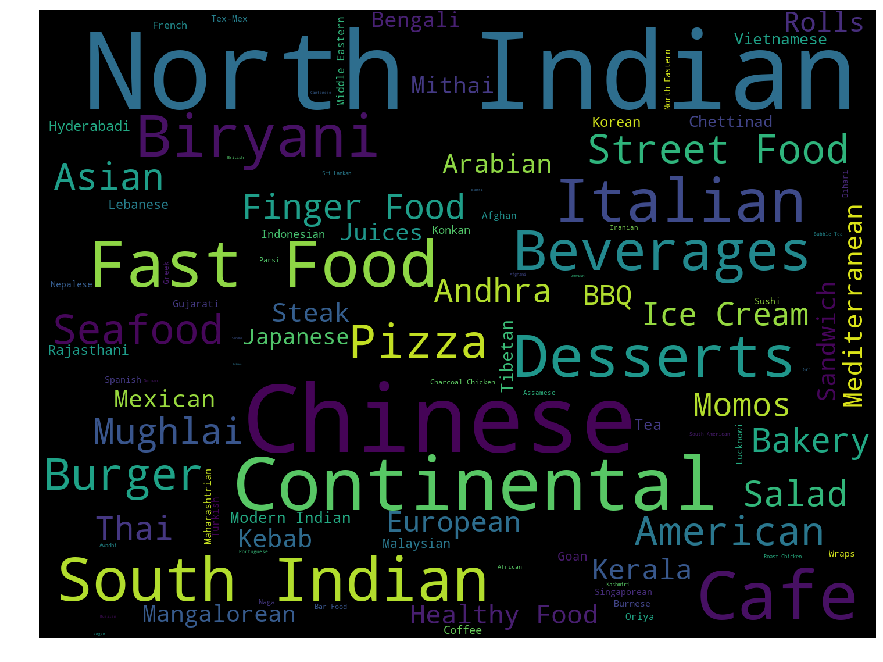

In [25]:
from subprocess import check_output
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(cuisine_grouped.iloc[:,1:].sum()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Clearly Looks like that North Indian , Chinese , Biriyani, Continental , Fast Food and South Indian are majorly liked in this city

Lets Check if the Rating of the Food is influenced by how Expensive a restaurant is ...

In [26]:
import statsmodels.formula.api as smf


Here I am converting the approx_cost(for two people) column to float from object to calculate Pearson's Correlation


In [37]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [36]:
p = df.dropna(subset=['approx_cost(for two people)', 'rate'])
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(p['approx_cost(for two people)'], p['rate']) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)


Pearson Correlation Coefficient:  0.0829354146014071 and a P-value of: 6.633647396643138e-28


With such a low P value we can reject our Null Hypothesis and can see that There is quite a strong relation between How expensive a place is and the Ratings given to them.

In [ ]:
map_df = pd.merge(rest_df[['location','location_latitude', 'location_longitude']].groupby('location').first(), cuisine_grouped, left_index=True, right_index=True)

In [ ]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
labels = set(kmeans.labels_)
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
j=0
for label in labels:
    group = map_df.groupby('Cluster Labels').get_group(label)
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
            )
        )
        i+=1
    colors = ['blue', 'green', 'purple']
    
    x = group.index
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)
venues_map

On analysing the data it was found that North Indian, Indian, South Indian are available and famous in most(approx 90%) of the neighborhood of Bengaluru. But among them the key observation were. Cluster 0 or those marked in Red are the places that are more famous for its foreign cuisines can be goan, assamese, bihari, american, thai etc.

Cluster 1 or those marked in Blue are the places that are more famous for its Biryani, Chinese, Fast food and North Indian food. 
Cluster 2 or those marked in Green are those places that are more famous for its South Indian, Indian, North Indian, Chinese as well as fast food.
Cluster 3 or those marked in Purple were those areas where Street Food, Chinese, Fast food were more popular or we can say more number of restaurants were present.

**Results :**

We made a pretty good analysis of the location, cuisines , food type, deliveries of the restaurants based on the Ratings and clusters of them in the City , It depends on the demand of the client as to where and what kind of Restaurant is suitable for him/her to build the food chain .


The Results have been visualised for better understanding along with Maps and statistical analysis using Pearsons' Coefficient to support our Hypothesis.